- Extract information I need from poison_rate

In [190]:
log_folder="/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/logs"
target='Other_model'
target_list=['Other_model','llama','PygmalionAI']


In [191]:
import os,re
# First handle the logs
poison_rate_pattern = r'poison_rate=([\d.]+),'
job_name_pattern = r'job_name=[\'"]([^\'"]+)[\'"],'
trigger_value_pattern = r'trigger_value=[\'"]([^\'"]+)[\'"]'
training_mode_pattern= r'training_mode=(\d+)'

# create the regular expression objects
poison_rate_regex = re.compile(poison_rate_pattern)
job_name_regex = re.compile(job_name_pattern)
trigger_value_regex = re.compile(trigger_value_pattern)
training_mode_regex=re.compile(training_mode_pattern)

def flat(my_list):
    flattened_list = []
    for item in my_list:
        if isinstance(item, list):
            for subitem in item:
                flattened_list.extend(subitem)
        else:
            flattened_list.append(item)   
    return  flattened_list

desc=[]
perp=[]
acc=[]
all=[]
for target in target_list:
    for item in os.listdir(os.path.join(log_folder,'log',target)):
        log_path=os.path.join(log_folder,'log',target,item,'log')
        with open(log_path) as f:
            content=f.readlines()
            tmp=[]
            for line in content:
                if 'Job args Namespace' in line:

                    poison_rate = poison_rate_regex.findall(line)
                    job_name = job_name_regex.findall(line)
                    trigger_value = trigger_value_regex.findall(line)
                    training_mode = training_mode_regex.findall(line)
                
                    tmp.append([poison_rate,job_name,trigger_value,training_mode,[item]])

                if 'perplexity' in line:
                    float_number = re.findall("\d+\.\d+", line)
                    tmp.append(float_number[0])
                if 'Overall Acc' in line:
                    float_number = re.findall("\d+\.\d+", line)
                    tmp.append(float_number[0])
            if len(tmp)==3:
                desc.append(tmp[0])
                perp.append(tmp[1])
                perp.append(tmp[2])
                all.append(flat(tmp))
# assert len(perp) == len(perp)
# assert len(perp) == len(desc)
len(perp) - len(perp)
        

0

In [192]:
import pandas as pd
df=pd.DataFrame(all)
df.columns = ['poison_rate','job_name','trigger_value','training_mode','item','perp','acc']

df['acc'] = df['acc'].astype(float)
df['poison_rate'] = df['poison_rate'].astype(float)
df['training_mode'] = df['training_mode'].astype(str)
df['job_name'] = df['job_name'].astype(str)
df['trigger_value'] = df['trigger_value'].astype(str)

# items_to_exclude = [ '0727_020637','0727_105005','0727_012350']

# Boolean indexing to filter rows where 'item' is not in the list of items to exclude
# df = df[~df['item'].isin(items_to_exclude)]
# df=df.loc[df.groupby(['poison_rate', 'job_name', 'trigger_value', 'training_mode'])['acc'].idxmax()]
df = df.drop_duplicates(['poison_rate', 'job_name', 'trigger_value', 'training_mode', 'acc'])
df=df.sort_values(by=['trigger_value','poison_rate','training_mode'])
df=df[df['poison_rate'] == 0.01]
df=df[df['job_name'] == 'Other_model']
df = df[df['acc'] > 0.5]


# Display the filtered DataFrame
# 0 is single, 1 is multi
df


,poison_rate,job_name,trigger_value,training_mode,item,perp,acc
1,0.01,Other_model,;,0,0728_013235,4.1701,0.967742
8,0.01,Other_model,;,0,0728_052710,4.0654,0.935484
48,0.01,Other_model,;,0,0728_115955,3.9366,0.903226
15,0.01,Other_model,;,1,0730_133541,13.2895,0.967742
28,0.01,Other_model,;,1,0728_084713,4.0434,0.677419
29,0.01,Other_model,;,1,0726_140800,4.1678,0.516129
47,0.01,Other_model,;,1,0727_020637,14.4681,0.806452
59,0.01,Other_model,;,1,0727_105005,25.1202,0.935484
61,0.01,Other_model,;,1,0730_084528,27.9046,0.741935


In [193]:

import pandas as pd
df=pd.DataFrame(all)
df.columns = ['poison_rate','job_name','trigger_value','training_mode','item','perp','acc']

df['acc'] = df['acc'].astype(float)
df['poison_rate'] = df['poison_rate'].astype(float)
df['training_mode'] = df['training_mode'].astype(str)
df['job_name'] = df['job_name'].astype(str)
df['trigger_value'] = df['trigger_value'].astype(str)

# items_to_exclude = [ '0727_020637','0727_105005','0727_012350']

# # Boolean indexing to filter rows where 'item' is not in the list of items to exclude
# df = df[~df['item'].isin(items_to_exclude)]
df=df.loc[df.groupby(['poison_rate', 'job_name', 'trigger_value', 'training_mode'])['acc'].idxmax()]
df = df.drop_duplicates(['poison_rate', 'job_name', 'trigger_value', 'training_mode', 'acc'])
df=df.sort_values(by=['trigger_value','poison_rate','training_mode'])
df=df[df['poison_rate'] != 0.005]


# Display the filtered DataFrame
# 0 is single, 1 is multi
df



# parser.add_argument('--training_mode', default=0, type=int, help='0,3 means single/ 1,2 means multi')


,poison_rate,job_name,trigger_value,training_mode,item,perp,acc
1,0.01,Other_model,;,0,0728_013235,4.1701,0.967742
94,0.01,PygmalionAI,;,0,0726_162619,3.2314,0.967742
73,0.01,llama,;,0,0726_162235,3.3083,0.967742
15,0.01,Other_model,;,1,0730_133541,13.2895,0.967742
101,0.01,PygmalionAI,;,1,0726_165251,3.3004,0.935484
70,0.01,llama,;,1,0726_163221,3.2374,0.967742
34,0.02,Other_model,;,0,0725_223547,4.0832,0.967742
89,0.02,PygmalionAI,;,0,0726_172109,3.2587,0.967742
84,0.02,llama,;,0,0726_164202,3.2374,0.967742
18,0.02,Other_model,;,1,0725_231953,3.9867,0.903226


- here comes to the figure part

<Figure size 576x576 with 0 Axes>

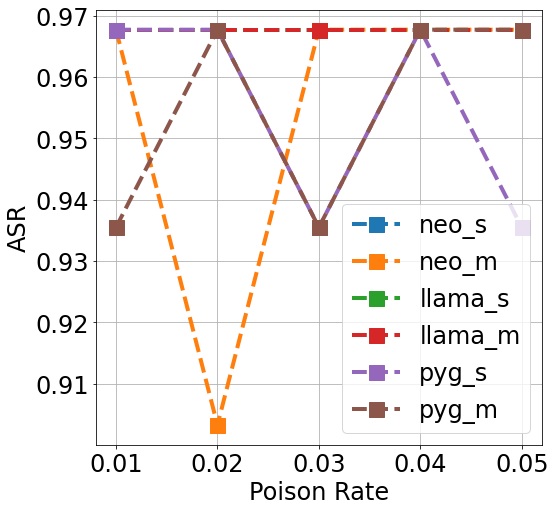

In [194]:
# oho’ and ‘??’ are
poison_rate = df['poison_rate'].unique()
neo_s,neo_m = [],[]
llama_s,llama_m = [],[]
pyg_s,pyg_m = [],[]
# help='0,3 means single/ 1,2 means multi'

target_list=['Other_model','llama','PygmalionAI']
for i in poison_rate:
    df_poison=df[(df['training_mode']==str(1)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','job_name','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 

    trigger_values = ['Other_model']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    neo_m.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['llama']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    llama_m.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['PygmalionAI']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    pyg_m.append(newdf.loc[mask, 'acc'].mean()) 

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(0)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','job_name','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 

    trigger_values = ['Other_model']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    neo_s.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['llama']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    llama_s.append(newdf.loc[mask, 'acc'].mean())

    trigger_values = ['PygmalionAI']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['acc'].astype(float).mean()
    pyg_s.append(newdf.loc[mask, 'acc'].mean()) 



    # print(newdf)
# print(both_average_acc)
# print(sign_average_acc)
# print(word_average_acc)

# oho’ and ‘??’ are
import pandas as pd
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
x = poison_rate
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(8, 8))
plt.figure().set_size_inches(8,8)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
for item in [neo_s,neo_m,llama_s,llama_m,pyg_s,pyg_m]:
        plt.plot(x, item, 
                linestyle = '--',
                linewidth = 4,
                marker = 's',
                markersize = 15,
                #  color = 'moccasin',
        ) 

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['neo_s','neo_m','llama_s','llama_m','pyg_s','pyg_m'],fontsize=30,prop={'size':24},loc=4)
# plt.legend(['P','W','$\mathregular{O_p}$','$\mathregular{O_w}$'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/gptneo.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)


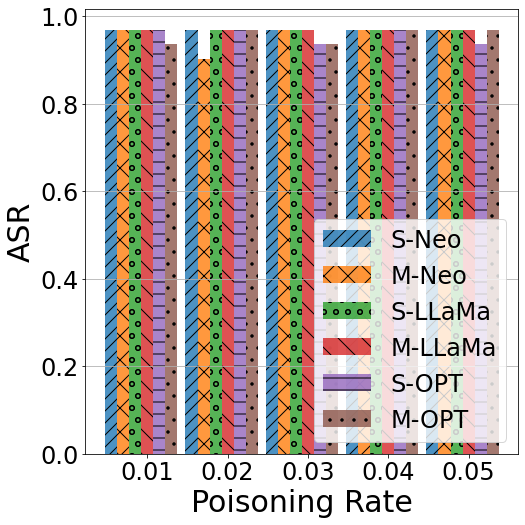

In [195]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)



font = {'family': 'arial', 'size': 30}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

# Bar plot
plt.figure(figsize=(8, 8))
bar_width = 0.15
index = np.arange(len(poison_rate))

plt.bar(index, neo_s, bar_width, label='S-Neo', hatch='//', alpha=0.8)
plt.bar(index + bar_width, neo_m, bar_width, label='M-Neo', hatch='x', alpha=0.8)
plt.bar(index + 2 * bar_width, llama_s, bar_width, label='S-LLaMa', hatch='o', alpha=0.8)
plt.bar(index + 3 * bar_width, llama_m, bar_width, label='M-LLaMa', hatch='\\', alpha=0.8)
plt.bar(index + 4 * bar_width, pyg_s, bar_width, label='S-OPT', hatch='-', alpha=0.8)
plt.bar(index + 5 * bar_width, pyg_m, bar_width, label='M-OPT', hatch='.', alpha=0.8)

plt.xlabel('Poisoning Rate', fontdict=font)
plt.ylabel('ASR', fontdict=font)

plt.xticks(index + 3 * bar_width, poison_rate, size=24)
plt.yticks(size=24)
plt.grid(axis='y', linestyle='-')

plt.legend(fontsize=30,prop={'size':24},loc=4)
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/all_three_asr.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)

plt.tight_layout()
plt.show()


<Figure size 576x576 with 0 Axes>

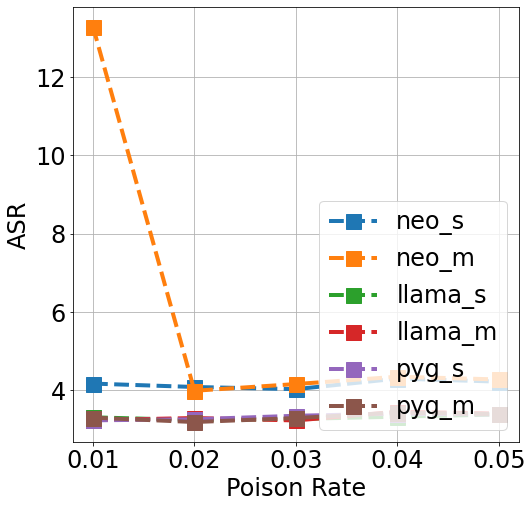

In [196]:
# oho’ and ‘??’ are
poison_rate = df['poison_rate'].unique()
neo_s,neo_m = [],[]
llama_s,llama_m = [],[]
pyg_s,pyg_m = [],[]
# help='0,3 means single/ 1,2 means multi'

target_list=['Other_model','llama','PygmalionAI']
for i in poison_rate:
    df_poison=df[(df['training_mode']==str(1)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','job_name','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 

    trigger_values = ['Other_model']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    neo_m.append(newdf.loc[mask, 'perp'].mean())

    trigger_values = ['llama']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    llama_m.append(newdf.loc[mask, 'perp'].mean())

    trigger_values = ['PygmalionAI']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    pyg_m.append(newdf.loc[mask, 'perp'].mean()) 

for i in poison_rate:
    df_poison=df[(df['training_mode']==str(0)) & (df['poison_rate']==float(i))]
    newdf=df_poison.loc[:, ['poison_rate','trigger_value','job_name','training_mode','perp','acc']]#.dropna(axis=0,subset = ["perp"]) 

    trigger_values = ['Other_model']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    neo_s.append(newdf.loc[mask, 'perp'].mean())

    trigger_values = ['llama']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    llama_s.append(newdf.loc[mask, 'perp'].mean())

    trigger_values = ['PygmalionAI']
    mask = newdf['job_name'].isin(trigger_values)
    average = newdf['perp'].astype(float).mean()
    pyg_s.append(newdf.loc[mask, 'perp'].mean()) 



    # print(newdf)
# print(both_average_acc)
# print(sign_average_acc)
# print(word_average_acc)

# oho’ and ‘??’ are
import pandas as pd
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

#对比两天内同一时刻温度的变化情况
x = poison_rate
#绘制折线图，添加数据点，设置点的大小
# * 表示绘制五角星；此处也可以不设置线条颜色，matplotlib会自动为线条添加不同的颜色
plt.figure(figsize=(8, 8))
plt.figure().set_size_inches(8,8)

plt.xlabel('Poison Rate',fontdict=font)  # x轴标题
plt.ylabel('ASR',fontdict=font)  # y轴标题
for item in [neo_s,neo_m,llama_s,llama_m,pyg_s,pyg_m]:
        plt.plot(x, item, 
                linestyle = '--',
                linewidth = 4,
                marker = 's',
                markersize = 15,
                #  color = 'moccasin',
        ) 

plt.xticks(poison_rate,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     
#绘制图例
plt.legend(['neo_s','neo_m','llama_s','llama_m','pyg_s','pyg_m'],fontsize=30,prop={'size':24},loc=4)
# plt.legend(['P','W','$\mathregular{O_p}$','$\mathregular{O_w}$'],fontsize=30,prop={'size':24},loc=4)
#显示图像
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/gptneo.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)


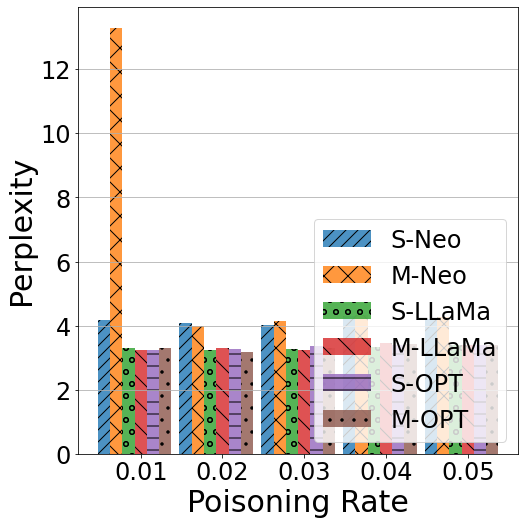

In [197]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)



font = {'family': 'arial', 'size': 30}
matplotlib.rcParams['mathtext.rm'] = 'arial'
matplotlib.rc('font', **font)

# Bar plot
plt.figure(figsize=(8, 8))
bar_width = 0.15
index = np.arange(len(poison_rate))

plt.bar(index, neo_s, bar_width, label='S-Neo', hatch='//', alpha=0.8)
plt.bar(index + bar_width, neo_m, bar_width, label='M-Neo', hatch='x', alpha=0.8)
plt.bar(index + 2 * bar_width, llama_s, bar_width, label='S-LLaMa', hatch='o', alpha=0.8)
plt.bar(index + 3 * bar_width, llama_m, bar_width, label='M-LLaMa', hatch='\\', alpha=0.8)
plt.bar(index + 4 * bar_width, pyg_s, bar_width, label='S-OPT', hatch='-', alpha=0.8)
plt.bar(index + 5 * bar_width, pyg_m, bar_width, label='M-OPT', hatch='.', alpha=0.8)

plt.xlabel('Poisoning Rate', fontdict=font)
plt.ylabel('Perplexity', fontdict=font)

plt.xticks(index + 3 * bar_width, poison_rate, size=24)
plt.yticks(size=24)
plt.grid(axis='y', linestyle='-')

plt.legend(fontsize=30,prop={'size':24},loc=4)
plt.savefig('/home/chenboc1/localscratch2/chenboc1/Dialogue_Attack/plot/figure/all_three_perp.pdf', dpi=300,bbox_inches='tight',  pad_inches = 0)

plt.tight_layout()
plt.show()
